### figure1s dataset

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
import os 
import json 
import utils
import importlib 
importlib.reload(utils)
from tqdm import tqdm
plt.rcParams['pdf.fonttype'] = 42

/home/feity/anaconda3/envs/pytorch/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
with open("/data/transformer_project/transforemer_model/pretrain_data/clean_dataset/annotations/total_pretrain.pkl", "rb") as f:
    d = pickle.load(f)
d.keys()


dict_keys(['info', 'licenses', 'images', 'annotations', 'categories'])

In [3]:
len(d["images"])

9050

In [12]:
names = []
for i in d["images"]:
    names.append(i["file_name"].split("/")[0])
names = np.unique(names)
print(len(names))
Tcells = 0 
THP1 = 0 
A549 = 0 
for i in names:
    if i.startswith("sll"):
        Tcells += 1 
    elif i.startswith("wzx"):
        THP1 += 1   
    elif i.startswith("zxs"):
        A549 += 1
    else:
        print("error", i)

181


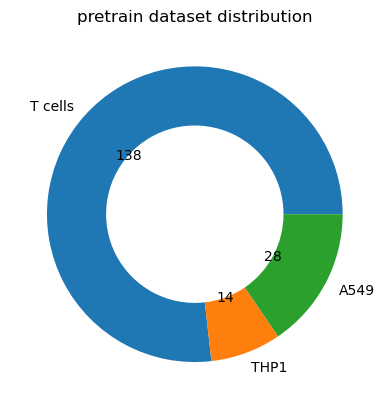

In [18]:
import matplotlib.pyplot as plt

# Data
sizes = [Tcells, THP1, A549]
labels = ['T cells', 'THP1', 'A549']

def show_values(val):
    absolute_value = int(val / 100. * sum(sizes))  # Convert percentage to actual value
    return f'{absolute_value}'  # Return raw value as label

# Plot
plt.pie(sizes, labels=labels, wedgeprops=dict(width=0.4), autopct=show_values)
plt.title("pretrain dataset distribution")
plt.savefig("./res/pretrain_distribution.pdf")
plt.show()


In [7]:
import modules 
ds = modules.CocoDetection("/data/transformer_project/transforemer_model/pretrain_data/clean_dataset/", 
                           "/data/transformer_project/transforemer_model/pretrain_data/clean_dataset/annotations/total_pretrain.pkl",
                           is_npy=True, filter_class=[1, 3], map_class={"1":0, "3":1}, filtermin=5) 


loading annotations into memory...
Done (t=1.12s)
creating index...
index created!


In [19]:
ones = []
zeros = []
for i in tqdm(ds):
    ones.append(i["labels"]['class_labels'].sum().item())
    zeros.append((i["labels"]['class_labels'] == 0).sum().item())
    # break
# i["labels"]

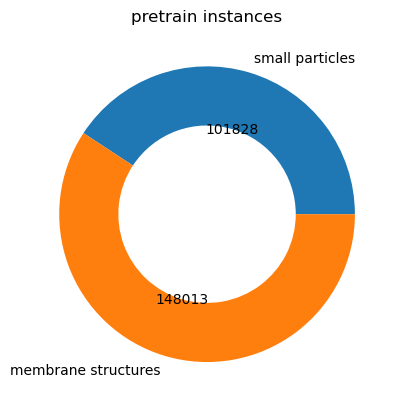

In [21]:
total_ones = np.array(ones).sum()
total_zeros = np.array(zeros).sum()
# Data
sizes = [total_zeros, total_ones]
labels = ['small particles', 'membrane structures']

def show_values(val):
    absolute_value = int(val / 100. * sum(sizes))  # Convert percentage to actual value
    return f'{absolute_value}'  # Return raw value as label

# Plot
plt.pie(sizes, labels=labels,   
        wedgeprops=dict(width=0.4), autopct=show_values)
plt.title("pretrain instances")
plt.savefig("./res/pretrain_instances.pdf")
plt.show()

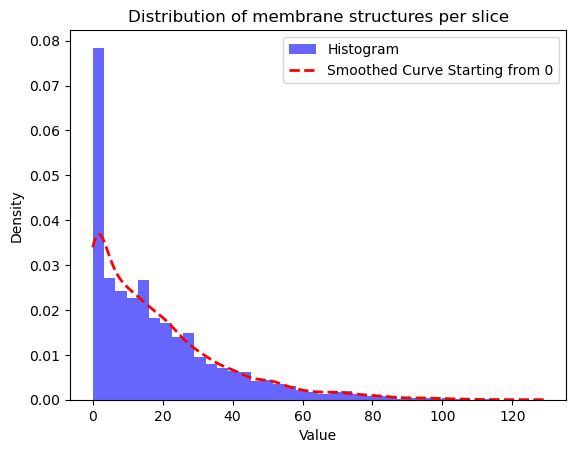

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Example array of samples
samples = ones  # Generate random samples (Normal Distribution)

# Plot histogram
plt.hist(samples, bins=40, density=True, alpha=0.6, color='blue', label='Histogram')

# Add smoothed curve using SciPy's gaussian_kde
kde = gaussian_kde(samples)
x_vals = np.linspace(min(samples), max(samples), 1000)  # Generate x-axis values
y_vals = kde(x_vals)

# Adjust the KDE curve to start from 0
y_vals[x_vals < min(samples)] = 0  # Ensure the curve starts from 0 for values less than minimum

# Plot the adjusted smoothed curve
plt.plot(x_vals, y_vals, color='red', linestyle='--', linewidth=2, label='Smoothed Curve Starting from 0')

# Add labels and title
plt.title('Distribution of membrane structures per slice')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.savefig("./res/pretrain_distribution_ones.pdf", bbox_inches='tight')
# Show the plot
plt.show()


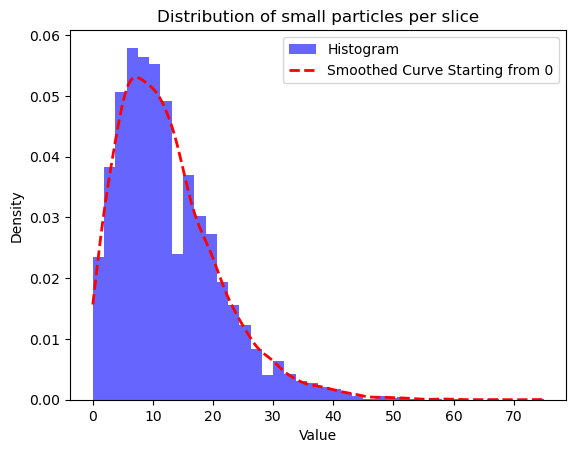

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Example array of samples
samples = zeros  # Generate random samples (Normal Distribution)

# Plot histogram
plt.hist(samples, bins=40, density=True, alpha=0.6, color='blue', label='Histogram')

# Add smoothed curve using SciPy's gaussian_kde
kde = gaussian_kde(samples)
x_vals = np.linspace(min(samples), max(samples), 1000)  # Generate x-axis values
y_vals = kde(x_vals)

# Adjust the KDE curve to start from 0
y_vals[x_vals < min(samples)] = 0  # Ensure the curve starts from 0 for values less than minimum

# Plot the adjusted smoothed curve
plt.plot(x_vals, y_vals, color='red', linestyle='--', linewidth=2, label='Smoothed Curve Starting from 0')

# Add labels and title
plt.title('Distribution of small particles per slice')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.savefig("./res/pretrain_distribution_zeros.pdf", bbox_inches='tight')
# Show the plot
plt.show()


In [34]:
labels = []
for i in ["TS_005.pkl", "TS_023.pkl", "TS_031.pkl", "sllt0039_9.pkl", "sllt0051_9.pkl", "sllt0081_9.pkl"]:
    # dataset = modules.CocoTraverse("/mnt/panbz/lab/transforemer_model/train_data/training/data/", 
    #                         "/mnt/panbz/lab/transforemer_model/train_data/training/data/annotations/"+i,
    #                         is_npy=True, filter_class={"all":[1,2,3,4,5,6,7,8,9,10,11,12,13]}, single_class={"all":False}, add_classname=True, maxsize=800, require_mask=True) 
    dataset = modules.CocoDetection(
                                    "/data/transformer_project/transforemer_model/train_data/training/data/", 
                            "/data/transformer_project/transforemer_model/train_data/training/data/annotations/"+i,
                            is_npy=True, filter_class=[3, 4, 7, 12, 14], map_class={"3":0, "4":1, "7":2, "12":3, "14":4}, require_mask=True, transform=utils.getConstantTransform(), add_classname=True, norm="hist",filtermin=5
    )
    for j in dataset:
        labels.append(j["labels"]["names"])
labels

loading annotations into memory...
Done (t=0.01s)
creating index...
index created!
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
loading annotations into memory...
Done (t=0.02s)
creating index...
index created!
loading annotations into memory...
Done (t=0.01s)
creating index...
index created!
loading annotations into memory...
Done (t=0.01s)
creating index...
index created!
loading annotations into memory...
Done (t=0.01s)
creating index...
index created!


[['ribo', 'nucleus', 'mitochondria', 'microtubule'],
 ['ribo', 'ribo', 'ribo', 'ribo', 'nucleus', 'mitochondria'],
 ['ribo',
  'ribo',
  'ribo',
  'ribo',
  'ribo',
  'ribo',
  'nucleus',
  'mitochondria',
  'microtubule'],
 ['ribo',
  'ribo',
  'ribo',
  'ribo',
  'ribo',
  'ribo',
  'nucleus',
  'mitochondria',
  'microtubule'],
 ['ribo',
  'ribo',
  'ribo',
  'ribo',
  'ribo',
  'ribo',
  'ribo',
  'ribo',
  'ribo',
  'ribo',
  'ribo',
  'nucleus',
  'mitochondria'],
 ['ribo',
  'ribo',
  'ribo',
  'ribo',
  'ribo',
  'ribo',
  'ribo',
  'ribo',
  'ribo',
  'ribo',
  'ribo',
  'ribo',
  'ribo',
  'ribo',
  'ribo',
  'ribo',
  'ribo',
  'nucleus',
  'mitochondria',
  'mitochondria'],
 ['ribo',
  'ribo',
  'ribo',
  'ribo',
  'ribo',
  'ribo',
  'ribo',
  'ribo',
  'ribo',
  'ribo',
  'ribo',
  'ribo',
  'ribo',
  'ribo',
  'ribo',
  'ribo',
  'ribo',
  'ribo',
  'ribo',
  'ribo',
  'ribo',
  'ribo',
  'nucleus',
  'endoplasmic_reticulum_or_Golgi',
  'mitochondria',
  'mitochondria'],

In [35]:
name, cnts = np.unique(np.concatenate(labels), return_counts=True)

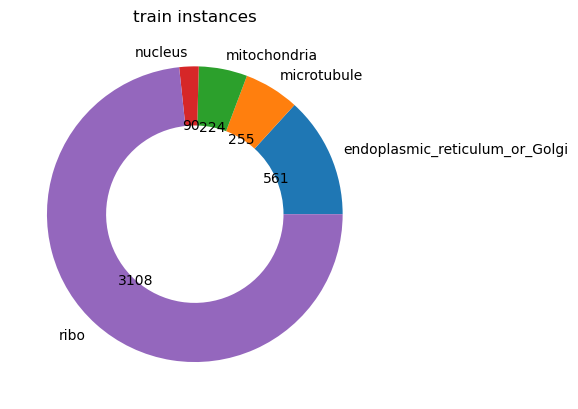

In [37]:
sizes = cnts
labels = name

def show_values(val):
    absolute_value = int(val / 100. * sum(sizes))  # Convert percentage to actual value
    return f'{absolute_value}'  # Return raw value as label

# Plot
plt.pie(sizes, labels=labels,   
        wedgeprops=dict(width=0.4), autopct=show_values)
plt.title("train instances")
plt.savefig("./res/train_instances.pdf")
plt.show()

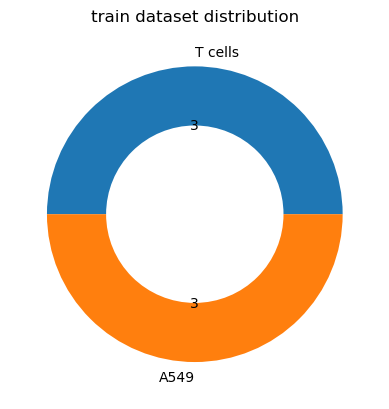

In [38]:
sizes = [3, 3]
labels = ['T cells', 'A549']

def show_values(val):
    absolute_value = int(val / 100. * sum(sizes))  # Convert percentage to actual value
    return f'{absolute_value}'  # Return raw value as label

# Plot
plt.pie(sizes, labels=labels, wedgeprops=dict(width=0.4), autopct=show_values)
plt.title("train dataset distribution")
plt.savefig("./res/train_distribution.pdf")
plt.show()

In [ ]:
dataset = modules.CocoDetection(
                            "/data/transformer_project/transforemer_model/train_data/training/data/", 
                            "/data/transformer_project/transforemer_model/train_data/training/data/annotations/sllt0039_9.pkl",
                            is_npy=True, filter_class=[3, 4, 7, 12, 14], map_class={"3":0, "4":1, "7":2, "12":3, "14":4}, require_mask=True, transform=utils.getConstantTransform(), add_classname=True, norm="hist",filtermin=5
)

loading annotations into memory...
Done (t=0.02s)
creating index...
index created!


In [49]:
cnt = 0
for i in dataset:
    plt.figure(figsize=(10, 10))
    i["pixel_values"][0] = i["pixel_values"][1]
    i["pixel_values"][2] = i["pixel_values"][1]
    utils.drawannotation(i["pixel_values"], i["labels"])
    plt.xticks([])  # Remove x-axis ticks
    plt.yticks([]) 
    plt.savefig("./res/sll0039/%d.png"%cnt, dpi=300)
    plt.close()
    cnt += 1

/home/feity/cryoem/utils.py:113: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  image = torch.tensor(image * 255).type(torch.uint8)
/home/feity/anaconda3/envs/pytorch/lib/python3.12/site-packages/torchvision/utils.py:225: UserWarning: Argument 'font_size' will be ignored since 'font' is not set.
  warnings.warn("Argument 'font_size' will be ignored since 'font' is not set.")


In [41]:
i

{'pixel_values': tensor([[[0.7680, 0.6934, 0.6004,  ..., 0.4190, 0.2309, 0.3951],
          [0.5122, 0.5071, 0.4327,  ..., 0.5052, 0.3087, 0.2295],
          [0.4532, 0.3860, 0.3556,  ..., 0.5429, 0.4802, 0.3928],
          ...,
          [0.5661, 0.5678, 0.5586,  ..., 0.7949, 0.8507, 0.7922],
          [0.3096, 0.3528, 0.4191,  ..., 0.5792, 0.7283, 0.6209],
          [0.2329, 0.3414, 0.3947,  ..., 0.5494, 0.6634, 0.5173]],
 
         [[0.4227, 0.6971, 0.6642,  ..., 0.5088, 0.3615, 0.1958],
          [0.6632, 0.6183, 0.5865,  ..., 0.5369, 0.3395, 0.3237],
          [0.5414, 0.4295, 0.4089,  ..., 0.5080, 0.3763, 0.3349],
          ...,
          [0.4460, 0.4130, 0.3209,  ..., 0.6013, 0.6999, 0.5506],
          [0.1885, 0.2462, 0.2072,  ..., 0.4912, 0.6211, 0.4479],
          [0.6150, 0.2913, 0.2755,  ..., 0.4453, 0.4932, 0.6714]],
 
         [[0.4582, 0.4447, 0.4757,  ..., 0.5171, 0.4717, 0.2928],
          [0.6394, 0.5109, 0.5139,  ..., 0.4580, 0.4137, 0.3814],
          [0.5563, 0.445